In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

urlfile = 'https://raw.githubusercontent.com/AlfieDelgado/DataCamp-A-Visual-History-of-Nobel-Prize-Winners/master/datasets/nobel.csv'

nobel = pd.read_csv(urlfile)
display(nobel)


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


In [17]:
# 1901 - 2016 arasinda dagitilan Nobel odullerinin sayisi
print(len(nobel))

# Nobel kazanan erkek/kadin sayisi
print(nobel['sex'].value_counts())

# Nobel kazananlarin ulkesi ilk 10
print(nobel['birth_country'].value_counts().head(10))


911
Male      836
Female     49
Name: sex, dtype: int64
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64


In [18]:
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'

nobel['decade'] = (np.floor(nobel['year'] / 10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# her 10 yilda ABD dogumlu Nobel kazananlarin orani
print(prop_usa_winners)




    decade  usa_born_winner
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.292683


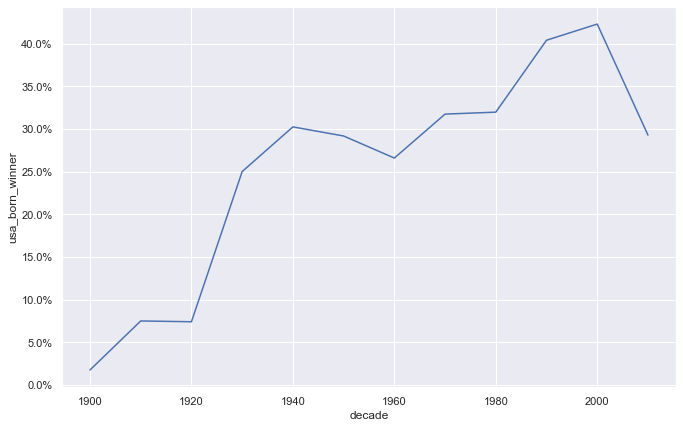

In [19]:
# ABD nobel odullerine ne zaman hukmetmeye basladi?
sns.set()
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [11, 7]
ax = sns.lineplot(x = 'decade', y = 'usa_born_winner', data = prop_usa_winners)

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

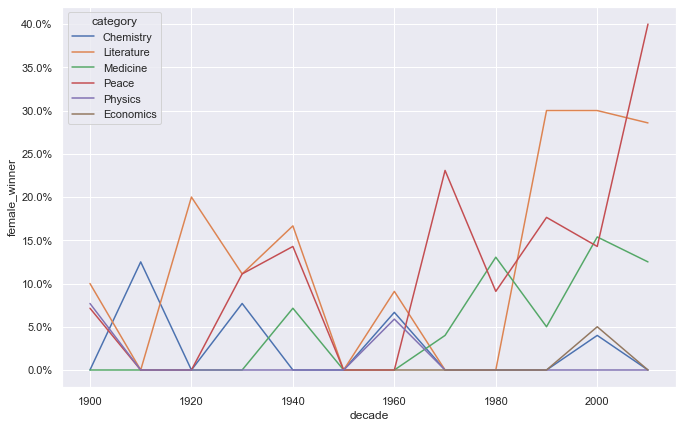

In [20]:
# her 10 yilda Nobel odulu kazanan kadinlarin orani
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

ax = sns.lineplot(x = 'decade', y = 'female_winner', hue = 'category', data = prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Genel olarak Chemistry, Physics ve Economics oldukca dengesiz. 
# Medicine daha olumlu bir egilime sahip.
# 1990'lardan sonra Literature de daha dengeli bir sekilde artista.

In [21]:
# Nobel odulunu alan ilk kadin
nobel[nobel.sex == 'Female'].nsmallest(1, 'year')


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


In [22]:
# iki ya da daha fazla Nobel odulu alanlar
display(nobel.groupby('full_name').filter(lambda group: len(group) >= 2))


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


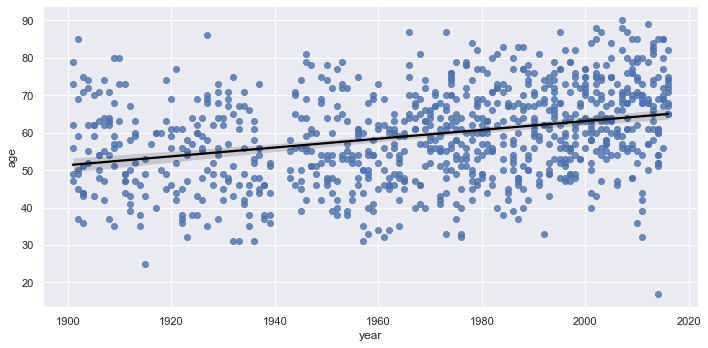

In [23]:
# Nobel genellikle kac yaslarinda alinmis?
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

sns.lmplot(x='year', y='age', data=nobel, aspect=2, line_kws={'color':'black'})

# 1939 - 1945 arasi yani Ikinci Dunya Savasi sirasinda nobel odullerinde bir azalma oldugu goruluyor.
# Nobel odulu kazanma yasi 55 yas civari.
# Ancak gunumuze dogru 65 yasa yaklasmis. Ancak gunumuze dogru 65 yasa yaklasmis.
# Gunumuze yaklastikca Nobel kazananma yogunlugu artmis gorunuyor.
# Bunun sebebi gunumuzde bir cok odulun artik paylasiyor olmasi. Dolayisiyla daha cok Nobel kazanan var.


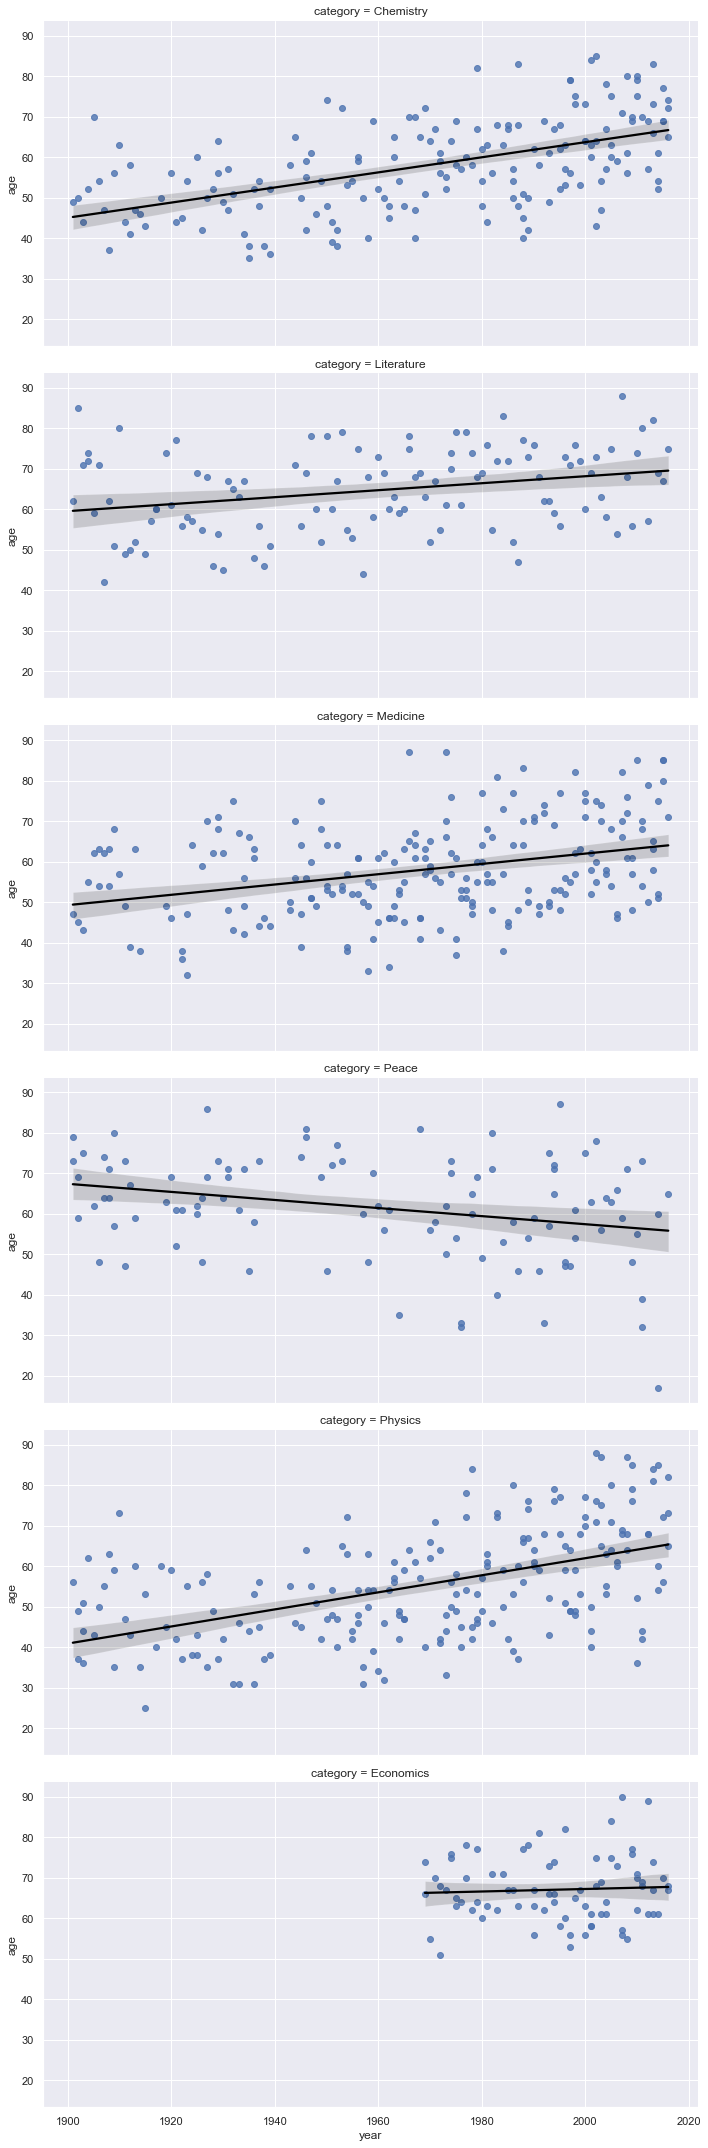

In [24]:
# Nobel odulleri kategorilerine gore yas farkliliklari

sns.lmplot(x='year', y='age', row='category', data=nobel,
aspect=2, line_kws={'color' : 'black'})

# Chemistry, Medicine ve Physics kategorilerinde nobel alma yasi gittikce buyumus.
# Ozellille Physics kategorisinde yas ortalamasi 50'den neredeyse 70'e gelmis.
# Literature ve Economics daha stabil diyebiliriz. Ayrica Economics'in yeni bir kategori oldugunu gorebiliriz.
# Bunlarin tam tersine Peace kategorisinde nobel kazananlarin yas ortalamasi gittikce dusmus.

In [26]:
# En yasli Nobel kazanan
display(nobel.nlargest(1, 'age'))


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


In [27]:
# En genc Nobel kazanan
display(nobel.nsmallest(1, 'age'))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
